In [18]:
import numpy as np
from skimage import io
import skimage.segmentation as segmentation
import skimage.measure as measure
import matplotlib.pyplot as plt
import cv2


<tifffile.TiffFile '20240917_delta6_5.tif'> OME series cannot handle discontiguous storage ((1608, 1608, 3) != (3, 1608, 1608))


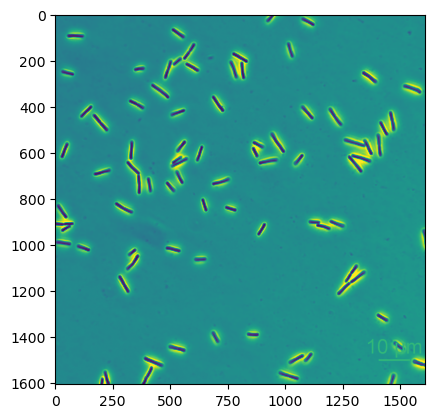

In [38]:
img_path = "../images/20240917_delta6_5.tif"

image = io.imread(img_path, as_gray=True)
image = (image*255).astype(np.uint8)

plt.imshow(image)
plt.show()


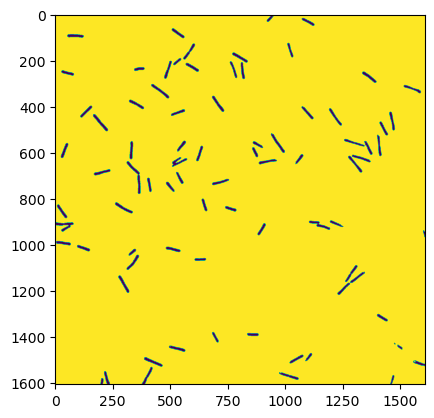

In [41]:
blurred = cv2.GaussianBlur(image, (5,5), 0)
# _, bin_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# bin_image = (bin_image*255).astype(np.uint8)

thres_value = 100
_, bin_image = cv2.threshold(blurred, thres_value, 255, cv2.THRESH_BINARY)

plt.imshow(bin_image)
plt.show()



In [42]:
bbox_lower_coords = (0, 0)
all_contours_flag = True
closed = True # want contours to be closed

mode = cv2.RETR_CCOMP if all_contours_flag else cv2.RETR_EXTERNAL

contours, hierarchy = cv2.findContours(bin_image, mode, cv2.CHAIN_APPROX_NONE) # chain approx refers to contour approximation (are all points in contour stored or no?)

print(f"type/len contours: {type(contours)}", {len(contours)})
# print(f"hierarchy: {hierarchy}, {type(hierarchy)}")




type/len contours: <class 'tuple'> {75}


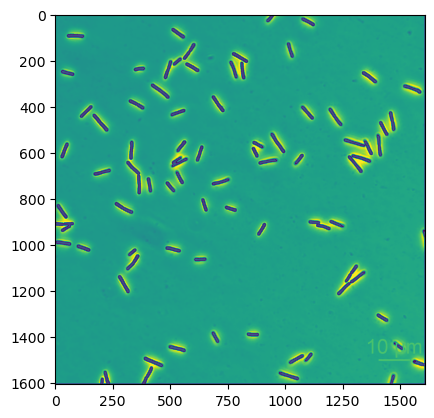

In [43]:
highlight_color = (0, 0, 255)

for contour in contours:
    cv2.drawContours(image, [contour], -1, highlight_color, 2)

plt.imshow(image)
plt.show()



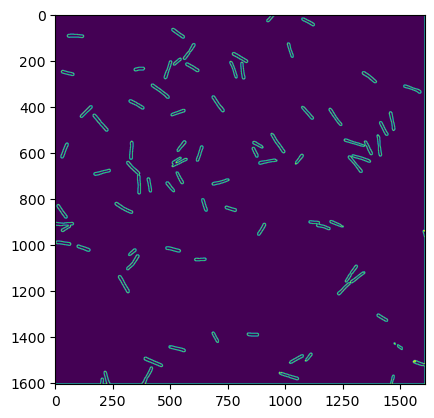

In [45]:
test_image = np.zeros((image.shape), dtype=np.uint8)

for contour in contours:
    cv2.drawContours(test_image, [contour], -1, (255), 2)

plt.imshow(test_image)
plt.show()



